# Bike Sharing Demand

- 도시 자전거 공유 시스템 사용 예측
- [캐글](https://www.kaggle.com)의 [Bike Sharing Demand](https://www.kaggle.com/c/bike-sharing-demand)에서 `train.csv`와 `test.csv`를 다운로드
- 두 파일을 각각 datasets 디렉토리에 bike_train.csv bike_test.csv로 저장 

- 자전거 대여량을 예측하는 문제
- Evaluation : Submissions are evaluated one the Root Mean Squared Logarithmic Error (RMSLE). 

## 데이터 탐색 및 전처리

In [294]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [360]:
%matplotlib inline
plt.style.use('ggplot')
# 스타일 리스트 출력
#plt.style.available

* [Style 정보](https://matplotlib.org/stable/gallery/style_sheets/style_sheets_reference.html)

In [464]:
bike_train = pd.read_csv('datasets/bike_train.csv')
bike_test = pd.read_csv('datasets/bike_test.csv')
bike_train.shape

(10886, 12)

{'whiskers': [<matplotlib.lines.Line2D at 0x171d3573130>,
 'caps': [<matplotlib.lines.Line2D at 0x171d35737f0>,
 'boxes': [<matplotlib.lines.Line2D at 0x171d3562d90>,
 'medians': [<matplotlib.lines.Line2D at 0x171d3573e80>,
 'fliers': [<matplotlib.lines.Line2D at 0x171d357f1f0>,
 'means': []}

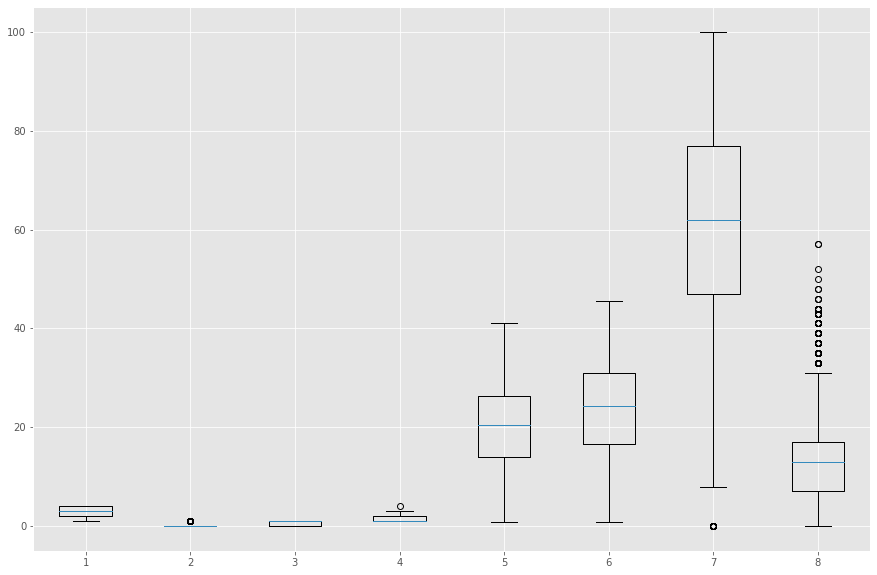

In [465]:
plt.figure(figsize=(15, 10))
plt.boxplot(bike_train.iloc[:,1:-3])

In [466]:
bike_train = bike_train[bike_train.humidity != 0]

In [467]:
bike_train = bike_train[bike_train.windspeed < 26]

{'whiskers': [<matplotlib.lines.Line2D at 0x171d37321f0>,
 'caps': [<matplotlib.lines.Line2D at 0x171d37328b0>,
 'boxes': [<matplotlib.lines.Line2D at 0x171d3654e50>,
 'medians': [<matplotlib.lines.Line2D at 0x171d3732f70>,
 'fliers': [<matplotlib.lines.Line2D at 0x171d373e310>,
 'means': []}

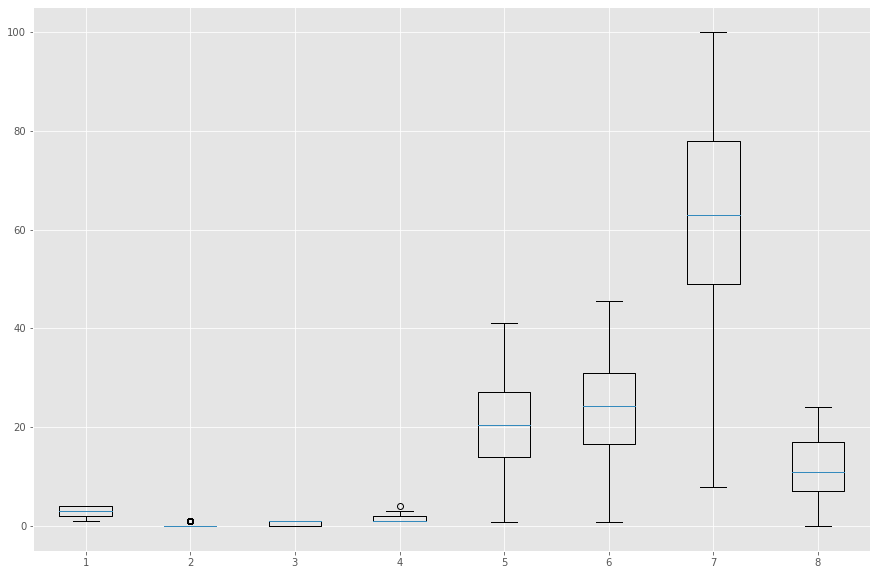

In [468]:
plt.figure(figsize=(15, 10))
plt.boxplot(bike_train.iloc[:,1:-3])

In [438]:
bike_train

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129


In [452]:
bike_train.iloc[5400]

datetime      2012-01-01 00:00:00
season                          1
holiday                         0
workingday                      0
weather                         1
temp                        14.76
atemp                       18.94
humidity                       66
windspeed                     0.0
casual                          5
registered                     43
count                          48
Name: 5422, dtype: object

In [443]:
bike_train.iloc[:,:-1].columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered'],
      dtype='object')

In [376]:
bike_train.head(3)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32


datetime: hourly date + timestamp  
season: 1 = 봄, 2 = 여름, 3 = 가을, 4 = 겨울  
holiday: 1 = 토, 일요일의 주말을 제외한 국경일 등의 휴일, 0 = 휴일이 아닌 날  
workingday: 1 = 토, 일요일의 주말 및 휴일이 아닌 주중, 0 = 주말 및 휴일  
weather:  
• 1 = 맑음, 약간 구름 낀 흐림  
• 2 = 안개, 안개 + 흐림  
• 3 = 가벼운 눈, 가벼운 비 + 천둥  
• 4 = 심한 눈/비, 천둥/번개  
temp: 온도(섭씨)   
atemp: 체감온도(섭씨)  
humidity: 상대습도  
windspeed: 풍속  
casual: 사전에 등록되지 않는 사용자가 대여한 횟수  
registered: 사전에 등록된 사용자가 대여한 횟수  
count: 대여 횟수  

In [377]:
bike_train.isnull().sum() #정제된 데이타.

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In [378]:
bike_train.corr() #count부분만 보면 된다. registred와 casual에 연관 가능성 엄청 높다.

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
season,1.000000,0.029368,-0.008126,0.008879,0.258689,0.264744,0.190610,-0.147121,0.096758,0.164011,0.163439
holiday,0.029368,1.000000,-0.250491,-0.007074,0.000295,-0.005215,0.001929,0.008409,0.043799,-0.020956,-0.005393
workingday,-0.008126,-0.250491,1.000000,0.033772,0.029966,0.024660,-0.010880,0.013373,-0.319111,0.119460,0.011594
weather,0.008879,-0.007074,0.033772,1.000000,-0.055035,-0.055376,0.406244,0.007261,-0.135918,-0.109340,-0.128655
temp,0.258689,0.000295,0.029966,-0.055035,1.000000,0.984948,-0.064949,-0.017852,0.467097,0.318571,0.394454
atemp,0.264744,-0.005215,0.024660,-0.055376,0.984948,1.000000,-0.043536,-0.057473,0.462067,0.314635,0.389784
humidity,0.190610,0.001929,-0.010880,0.406244,-0.064949,-0.043536,1.000000,-0.318607,-0.348187,-0.265458,-0.317371
windspeed,-0.147121,0.008409,0.013373,0.007261,-0.017852,-0.057473,-0.318607,1.000000,0.092276,0.091052,0.101369
casual,0.096758,0.043799,-0.319111,-0.135918,0.467097,0.462067,-0.348187,0.092276,1.000000,0.497250,0.690414
registered,0.164011,-0.020956,0.119460,-0.109340,0.318571,0.314635,-0.265458,0.091052,0.497250,1.000000,0.970948


In [ ]:
\

In [381]:
bike_train['datetime'] = pd.to_datetime(bike_train.datetime)
bike_train['year'] = bike_train.datetime.dt.year
bike_train['month'] = bike_train.datetime.dt.month
bike_train['hour'] = bike_train.datetime.dt.hour

In [408]:
bike_test['datetime'] = pd.to_datetime(bike_test.datetime)
bike_test['year'] = bike_test.datetime.dt.year
bike_test['month'] = bike_test.datetime.dt.month
bike_test['hour'] = bike_test.datetime.dt.hour

In [382]:
bike_train['time'] = pd.cut(bike_train['hour'], 4, labels = [0, 1, 2, 3])

In [409]:
bike_test['time'] = pd.cut(bike_test['hour'], 4, labels = [0, 1, 2, 3])

In [383]:
bike_train_drop = bike_train.drop(['holiday', 'workingday', 'casual', 'registered'], axis=1)

In [411]:
bike_test_drop = bike_test.drop(['holiday', 'workingday'], axis=1)

In [384]:
X_train = bike_train.drop(['casual', 'registered', 'count', 'datetime', 'hour', 'holiday', 'workingday'], axis=1)
y_train = bike_train[['count']]

In [412]:
X_test_test = bike_test.drop(['datetime', 'hour', 'holiday', 'workingday'], axis=1)

In [385]:
X_train

,season,weather,temp,atemp,humidity,windspeed,year,month,time
0,1,1,9.84,14.395,81,0.0000,2011,1,0
1,1,1,9.02,13.635,80,0.0000,2011,1,0
2,1,1,9.02,13.635,80,0.0000,2011,1,0
3,1,1,9.84,14.395,75,0.0000,2011,1,0
4,1,1,9.84,14.395,75,0.0000,2011,1,0
...,...,...,...,...,...,...,...,...,...
10881,4,1,15.58,19.695,50,26.0027,2012,12,3
10882,4,1,14.76,17.425,57,15.0013,2012,12,3
10883,4,1,13.94,15.910,61,15.0013,2012,12,3
10884,4,1,13.94,17.425,61,6.0032,2012,12,3


In [386]:
y_train

,count
0,16
1,40
2,32
3,13
4,1
...,...
10881,336
10882,241
10883,168
10884,129


In [387]:
X_train.columns

Index(['season', 'weather', 'temp', 'atemp', 'humidity', 'windspeed', 'year',
       'month', 'time'],
      dtype='object')

X_train.time = X_train.time.astype(np.int8)

In [ ]:
bike = X_train[['temp', 'atemp','humidity', 'windspeed', 'year', 'month', 'time', 'weather', 'season', 'time']]
#bike_train_pipe[['datetime', 'temp', 'atemp', 'humidity', 'windspeed']]

#ohe = OneHotEncoder(sparse=False)
#s2 = ohe.fit_transform(X_train[['weather', 'season', 'time']])
#cat_bike = pd.DataFrame(s2, columns=['맑음', '안개', '눈', '심한 눈', '봄', '여름', '가을', 
#                                     '겨울', 0, 1, 2, 3])
X_train_prepared = pd.concat([bike, cat_bike], axis=1)

bike

# 파이프라인

from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
import numpy as np

from sklearn.base import BaseEstimator, TransformerMixin
class num_pipe(BaseEstimator, TransformerMixin):
    def init(self):
        return
    def fit(X):
        return  # x
    def transform(X):
        X['datetime'] = pd.to_datetime(X.datetime)
        X['year'] = X.datetime.dt.year
        X['month'] = X.datetime.dt.month
        X['day'] = X.datetime.dt.day
        X['hour'] = X.datetime.dt.hour
        X = X.drop('datetime', axis=1)
        return X

bike_train_pipe = pd.read_csv('datasets/bike_train.csv')

num_pipe.transform(bike_train_pipe)

num_attribs = ['datetime', 'temp', 'atemp', 'humidity', 'windspeed'] #수치형 파이프라인
cat_attribs =['season', 'weather'] #범주형 파이프라인

num_pipeline = Pipeline([
        ('make', num_pipe())
    ])

cat_pipeline = Pipeline([       
        ('cat_encoder', OneHotEncoder(sparse=False)) #sparse가 True면 generator처럼 희소한 데이터에 대해 보여주지 않는다 허나 False면 굳이 안보여줘도 되지만 보여준다..!
        ])

preprocess_Pipeline = ColumnTransformer([
    ('num', num_pipeline, num_attribs),
    ('cat', cat_pipeline, cat_attribs)
])

X_train_prepared = preprocess_Pipeline.fit_transform(bike_train_pipe)

def trans_x(bike_train_pipe):
    global num_pipe
    global OneHotEncoder
    num_pipe.transform(bike_train_pipe[['datetime', 'temp', 'atemp', 'humidity', 'windspeed']])

    bike_train_pipe[['datetime', 'temp', 'atemp', 'humidity', 'windspeed']]

    ohe = OneHotEncoder(sparse=False)
    s2 = ohe.fit_transform(bike_train_pipe[['weather', 'season']])
    cat_bike = pd.DataFrame(s2, columns=[1, 2, 3, 4, 1, 2, 3, 4])
    X_train_prepared = pd.concat([cat_bike, num_pipe.transform(bike_train_pipe[['datetime', 'temp', 'atemp', 'humidity', 'windspeed']])], axis=1)

def trans_all(bike_train_pipe):
    global trans_x
    X_train_prepared = trans_x(bike_train_pipe)
    y_train = bike_train_pipe['count']
    return X_train_prepared, y_train

X_train, y_train = trans(bike_train)

X_test = trans_x(bike_test)

X_test

In [103]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [405]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [389]:
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, random_state=42)

In [390]:
forest_reg = RandomForestRegressor(random_state=42)

In [394]:
X_train.shape, y_train.shape

((8164, 9), (8164, 1))

In [395]:
forest_reg.fit(X_train, y_train)

<ipython-input-395-15c4a73631e4>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest_reg.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [403]:
y_pred = forest_reg.predict(X_test)

In [406]:
rmse = mean_squared_error(y_test, y_pred, squared=False) #squared모델을 적용 MSE 모델임 #기본 디폴트가 제곱이라 false하면 제곱근을 굳이 안 구해도 된다.
rmse #mse에서 squared를 해줘서 작게나옴

119.36621230195965

In [346]:
y_pred.shape

(10886,)

In [350]:
y_train.shape

(10886, 1)

In [352]:
def rmsle(y, pred):
    logY = np.log1p(y)
    logPred = np.log1p(pred)
    sq_error = (logY - logPred)**2
    rmsle = np.sqrt(np.mean(sq_error))
    return rmsle

In [353]:
rmsle(y_train.count, y_pred)

TypeError: loop of ufunc does not support argument 0 of type method which has no callable log1p method

# 예측

rmsle는 실제값의 log 예측값의 로그를 뺀 것 제곱의 평균의 root형태.

In [ ]:
np.log(실제값 + 1 ) - np.log(예측값 + 1)^2

In [414]:
submiss = forest_reg.predict(X_test_test)

In [415]:
submission = pd.read_csv("datasets/sampleSubmission.csv")
submission

,datetime,count
0,2011-01-20 00:00:00,0
1,2011-01-20 01:00:00,0
2,2011-01-20 02:00:00,0
3,2011-01-20 03:00:00,0
4,2011-01-20 04:00:00,0
...,...,...
6488,2012-12-31 19:00:00,0
6489,2012-12-31 20:00:00,0
6490,2012-12-31 21:00:00,0
6491,2012-12-31 22:00:00,0


In [416]:
submission["count"] = submiss
submission.head()

,datetime,count
0,2011-01-20 00:00:00,7.070000
1,2011-01-20 01:00:00,21.956667
2,2011-01-20 02:00:00,21.956667
3,2011-01-20 03:00:00,4.290000
4,2011-01-20 04:00:00,4.290000


In [417]:
ver = 1 

submission.to_csv("datasets/ver_{0}_submission_bike.csv".format(ver), index=False)